# 原始数据5m的可视化

In [1]:
import pandas as pd
#mocap是5m可视化
#Kinect是2m可视化
#IMU是5m可视化
data1_go= pd.read_csv("C:\\Users\\lyy\\Desktop\\Data\\Processed\\MOCAP_5m\\time01\\go\\task_normal\\sample03_task_normal.csv")
data2_go = pd.read_csv("C:\\Users\\lyy\\Desktop\\Data\\Processed\\Kinect_2m\\time01\\go\\task_normal\\sample03_task_normal.csv")
data3_go = pd.read_csv("C:\\Users\\lyy\\Desktop\\Data\\Processed\\IMU_5m\\time01\\go\\task_normal\\sample03_task_normal.csv")
data1_turn= pd.read_csv("C:\\Users\\lyy\\Desktop\\Data\\Processed\\MOCAP_5m\\time01\\turn\\task_normal\\sample03_task_normal.csv")
data2_turn = pd.read_csv("C:\\Users\\lyy\\Desktop\\Data\\Processed\\Kinect_2m\\time01\\turn\\task_normal\\sample03_task_normal.csv")
data3_turn = pd.read_csv("C:\\Users\\lyy\\Desktop\\Data\\Processed\\IMU_5m\\time01\\turn\\task_normal\\sample03_task_normal.csv")
data1_back= pd.read_csv("C:\\Users\\lyy\\Desktop\\Data\\Processed\\MOCAP_5m\\time01\\back\\task_normal\\sample03_task_normal.csv")
data2_back = pd.read_csv("C:\\Users\\lyy\\Desktop\\Data\\Processed\\Kinect_2m\\time01\\back\\task_normal\\sample03_task_normal.csv")
data3_back = pd.read_csv("C:\\Users\\lyy\\Desktop\\Data\\Processed\\IMU_5m\\time01\\back\\task_normal\\sample03_task_normal.csv")
data1_go_kinect = pd.read_csv("C:\\Users\\lyy\\Desktop\\Data\\Processed\\MOCAP_2m\\time01\\go\\task_normal\\sample03_task_normal.csv")

In [2]:
merged_1 = pd.concat([data1_go, data1_turn,data1_back], ignore_index=True)
merged_2 = pd.concat([data2_go, data2_turn,data2_back], ignore_index=True)
merged_3 = pd.concat([data3_go, data3_turn,data3_back], ignore_index=True)

In [3]:
yl1=(merged_1['Y19']-merged_1['Y19'][0])/1000
yl2=(merged_2['Z14']-merged_2['Z14'][0])
yl3=merged_3['角速度Y(°/s)']
yl1_go=(data1_go['Y19']-data1_go['Y19'][0])/1000
yl1_turn=(data1_turn['Y19']-data1_go['Y19'][0])/1000
yl1_back=(data1_back['Y19']-data1_go['Y19'][0])/1000
yl2_go=(data2_go['Z14']-data2_go['Z14'][0])-abs((data1_go_kinect['Y19'][0]-data1_go['Y19'][0])/1000)
yl2_turn=(data2_turn['Z14']-data2_go['Z14'][0])-abs((data1_go_kinect['Y19'][0]-data1_go['Y19'][0])/1000)
yl2_back=(data2_back['Z14']-data2_go['Z14'][0])-abs((data1_go_kinect['Y19'][0]-data1_go['Y19'][0])/1000)
yl3_go=data3_go['角速度Y(°/s)']
yl3_turn=data3_turn['角速度Y(°/s)']
yl3_back=data3_back['角速度Y(°/s)']
time1=merged_1['Timestamp']-merged_1['Timestamp'][0]
time2=merged_2['timestamp2']-merged_2['timestamp2'][0]
time3=merged_3['时间']-merged_3['时间'][0]
time1_go=data1_go['Timestamp']-data1_go['Timestamp'][0]
time1_turn=data1_turn['Timestamp']-data1_go['Timestamp'][0]
time1_back=data1_back['Timestamp']-data1_go['Timestamp'][0]
time2_go=data2_go['timestamp2']-data1_go['Timestamp'][0]
time2_turn=data2_turn['timestamp2']-data1_go['Timestamp'][0]
time2_back=data2_back['timestamp2']-data1_go['Timestamp'][0]
time3_go=data3_go['时间']-data3_go['时间'][0]
time3_turn=data3_turn['时间']-data3_go['时间'][0]
time3_back=data3_back['时间']-data3_go['时间'][0]

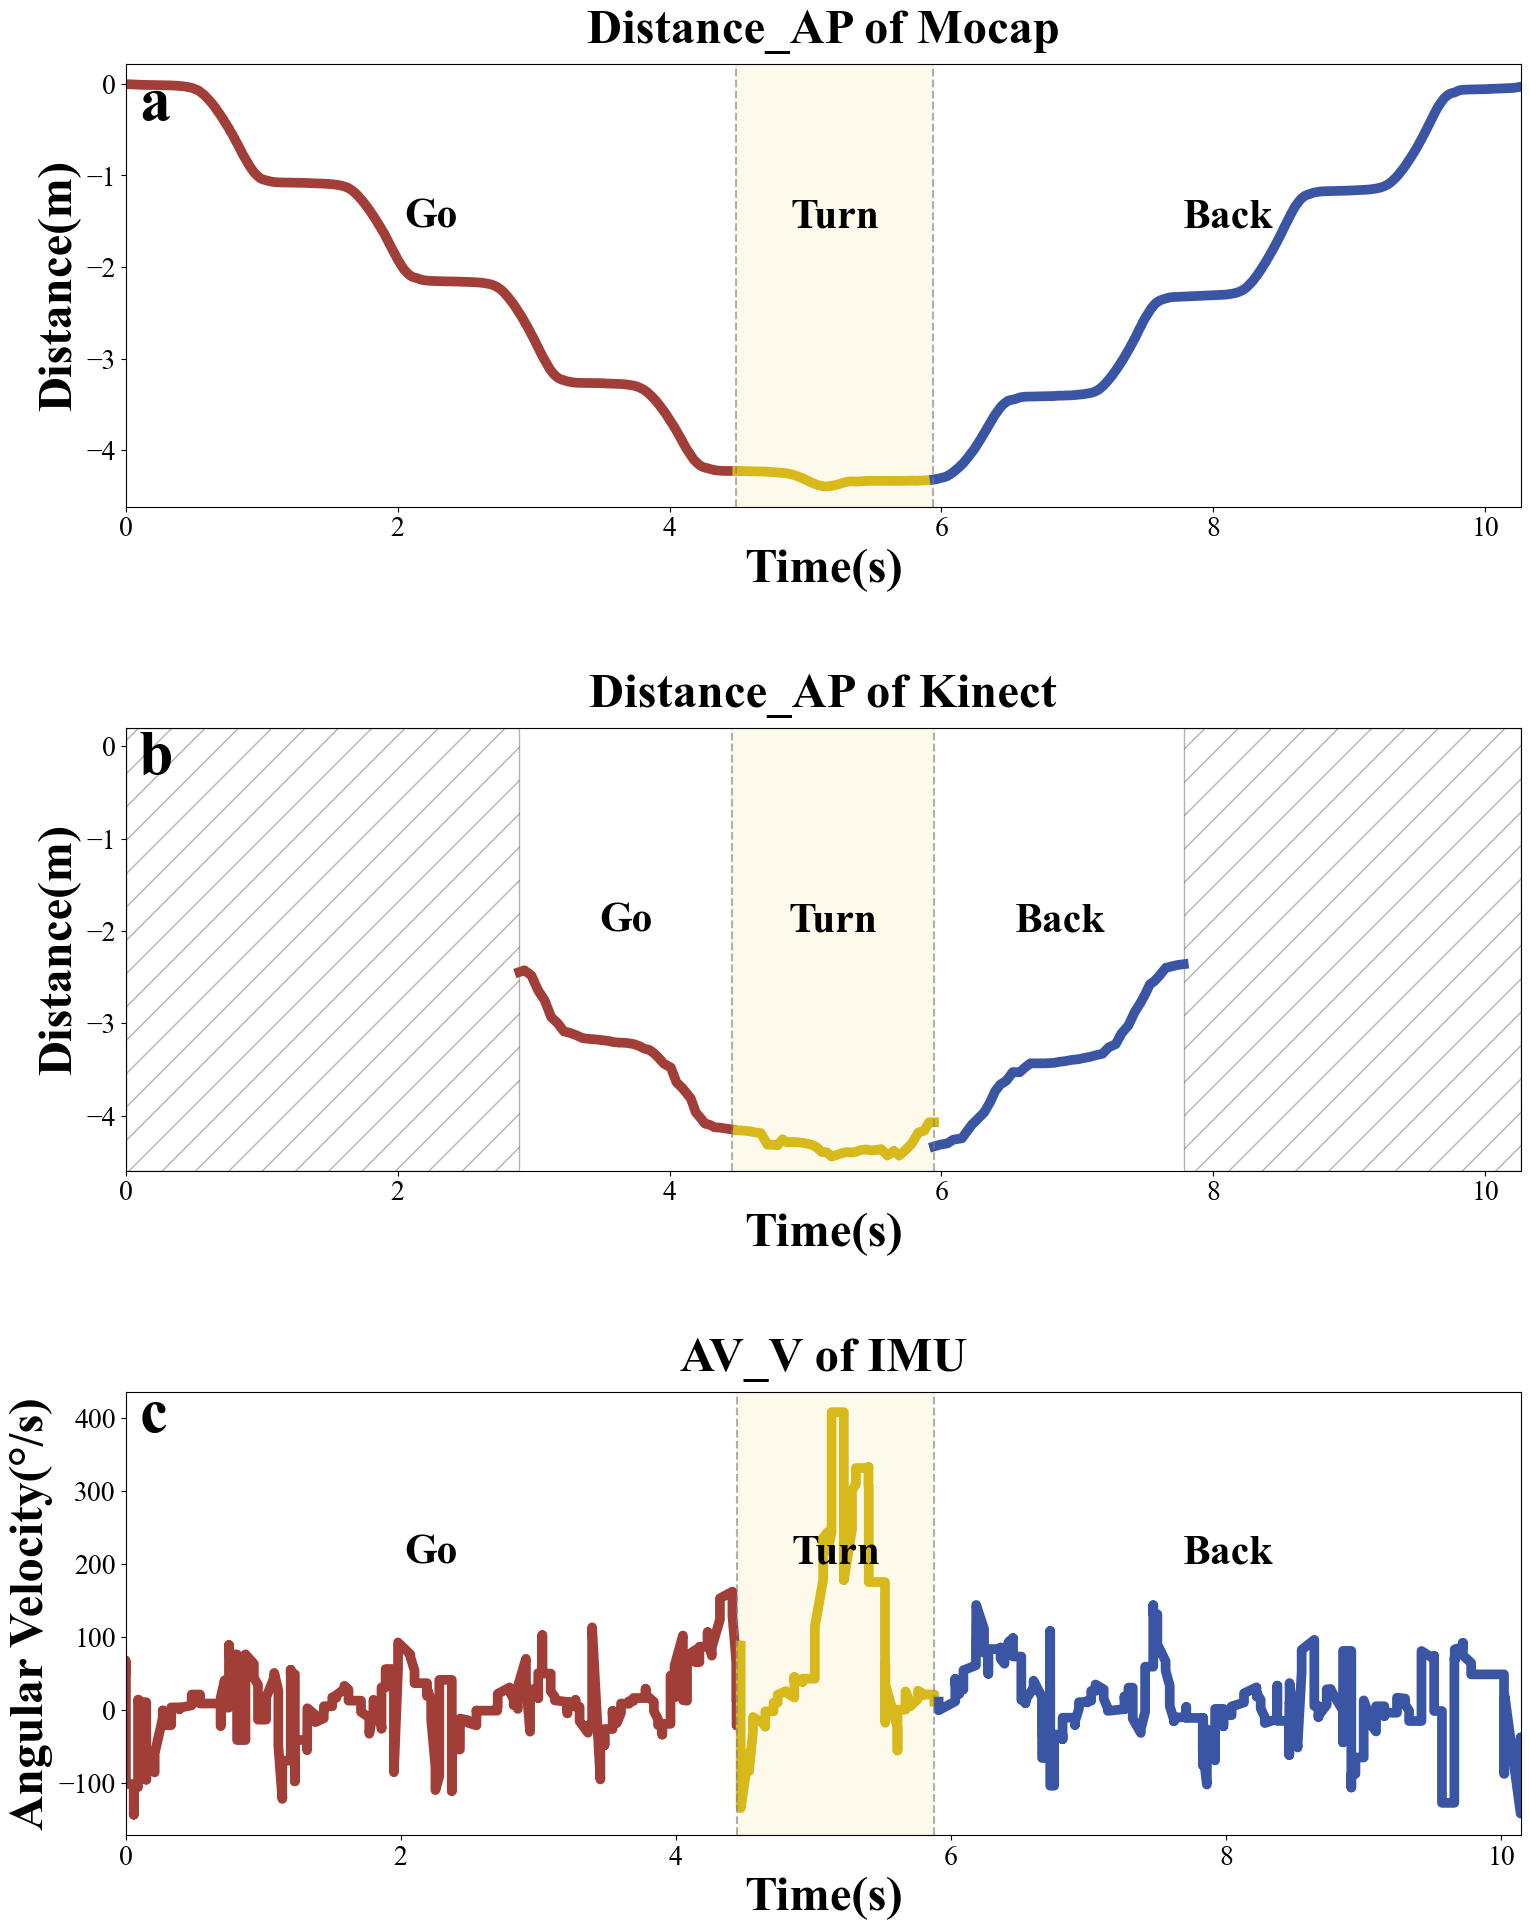

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 23))
plt.style.use('default')
custom_font = 'Times New Roman'
#plt.plot(time1, yl1,linewidth=5,color='#FA7F6F')
plt.subplot(3,1,1)
plt.plot(time1_go, yl1_go, linewidth=7, color='#A13E38')
plt.plot(time1_turn, yl1_turn, linewidth=7, color='#D7B91B')
plt.plot(time1_back, yl1_back, linewidth=7, color='#3A55A4')
plt.axvline(x=time1_go.iloc[-1], linestyle='--', color='gray', alpha=0.6)
plt.axvline(x=time1_turn.iloc[-1], linestyle='--', color='gray', alpha=0.6)
plt.axvspan(time1_go.iloc[-1], time1_turn.iloc[-1], color='#EECA40', alpha=0.1)
# 添加文字标签
plt.text((time1_go.iloc[-1] + time1_turn.iloc[-1]) / 2, -1.57, 'Turn', fontsize=30, color='black', ha='center',fontweight='bold',fontname=custom_font)
plt.text(time1_go.iloc[-1] / 2, -1.57, 'Go', fontsize=30, color='black', ha='center',fontweight='bold',fontname=custom_font)
plt.text((time1_turn.iloc[-1] + time1_back.iloc[-1]) / 2, -1.57, 'Back', fontsize=30, color='black', ha='center',fontweight='bold',fontname=custom_font)
plt.xlabel('Time(s)', fontsize=35,fontweight='bold',fontname=custom_font)  # Set x-axis label
plt.ylabel('Distance(m)', fontsize=35,fontweight='bold',fontname=custom_font)  # Set y-axis label
plt.xlim(0, max(time1))
plt.title('Distance_AP of Mocap', fontsize=35, pad=15,fontweight='bold',fontname=custom_font)
plt.xticks(fontsize=20, fontname=custom_font)  # 设置X轴刻度字体大小、加粗和字体
plt.yticks(fontsize=20, fontname=custom_font)
plt.text(0.1,-0.4, 'a' ,fontsize=45,fontweight='bold',fontname=custom_font)

plt.subplot(3,1,2)
plt.plot(time2_go, yl2_go, linewidth=7, color='#A13E38')
plt.plot(time2_turn, yl2_turn, linewidth=7, color='#D7B91B')
plt.plot(time2_back, yl2_back, linewidth=7, color='#3A55A4')
plt.axvline(x=time2_go.iloc[-1], linestyle='--', color='gray', alpha=0.6)
plt.axvline(x=time2_turn.iloc[-1], linestyle='--', color='gray', alpha=0.6)
plt.axvspan(time2_go.iloc[-1], time2_turn.iloc[-1], color='#EECA40', alpha=0.1)


import numpy as np
x_fill = np.linspace(0, time2_go.iloc[0], 200)
plt.fill_between(x_fill,min(yl1_turn)-0.2,0.2, hatch='/', alpha=0.3, label='x < 2' ,facecolor='none')
x_fill2 = np.linspace(time2_back.iloc[-1], max(time1), 200)
plt.fill_between(x_fill2,min(yl1_turn)-0.2,0.2, hatch='/', alpha=0.3, label='x < 2' ,facecolor='none')
# 添加文字标签
plt.text((time2_go.iloc[-1] + time2_turn.iloc[-1]) / 2, -2, 'Turn', fontsize=30, color='black', ha='center',fontweight='bold',fontname=custom_font)
plt.text((time2_go.iloc[0]+ time2_go.iloc[-1] )/ 2, -2, 'Go', fontsize=30, color='black', ha='center',fontweight='bold',fontname=custom_font)
plt.text((time2_turn.iloc[-1] + time2_back.iloc[-1]) / 2, -2, 'Back', fontsize=30, color='black', ha='center',fontweight='bold',fontname=custom_font)
plt.xlabel('Time(s)', fontsize=35,fontweight='bold',fontname=custom_font)  # Set x-axis label
plt.ylabel('Distance(m)', fontsize=35,fontweight='bold',fontname=custom_font)  # Set y-axis label
plt.xlim(0, max(time1))
plt.ylim(min(yl1_turn)-0.2,0.2)
plt.title('Distance_AP of Kinect', fontsize=35, pad=15,fontweight='bold',fontname=custom_font)
plt.xticks(fontsize=20, fontname=custom_font)  # 设置X轴刻度字体大小、加粗和字体
plt.yticks(fontsize=20, fontname=custom_font)
plt.text(0.1,-0.3, 'b' ,fontsize=45,fontweight='bold',fontname=custom_font)

plt.subplot(3,1,3)
#plt.plot(time1, yl1,linewidth=5,color='#FA7F6F')
plt.plot(time3_go, yl3_go, linewidth=7, color='#A13E38')
plt.plot(time3_turn, yl3_turn, linewidth=7, color='#D7B91B')
plt.plot(time3_back, yl3_back, linewidth=7, color='#3A55A4')

plt.axvline(x=time3_go.iloc[-1], linestyle='--', color='gray', alpha=0.6)
plt.axvline(x=time3_turn.iloc[-1], linestyle='--', color='gray', alpha=0.6)

plt.axvspan(time3_go.iloc[-1], time3_turn.iloc[-1], color='#EECA40', alpha=0.1)
# 添加文字标签
plt.text((time3_go.iloc[-1] + time3_turn.iloc[-1]) / 2, 200, 'Turn', fontsize=30, color='black', ha='center',fontweight='bold',fontname=custom_font)
plt.text(time3_go.iloc[-1] / 2, 200, 'Go', fontsize=30, color='black', ha='center',fontweight='bold',fontname=custom_font)
plt.text((time3_turn.iloc[-1] + time3_back.iloc[-1]) / 2, 200, 'Back', fontsize=30, color='black', ha='center',fontweight='bold',fontname=custom_font)
plt.xlabel('Time(s)', fontsize=35,fontweight='bold',fontname=custom_font)  # Set x-axis label
plt.ylabel('Angular Velocity(°/s)', fontsize=35,fontweight='bold',fontname=custom_font)  # Set y-axis label
plt.xlim(0, max(time3))
plt.title('AV_V of IMU', fontsize=35, pad=15,fontweight='bold',fontname=custom_font)
plt.xticks(fontsize=20, fontname=custom_font)  # 设置X轴刻度字体大小、加粗和字体
plt.yticks(fontsize=20, fontname=custom_font)
plt.text(0.1,380, 'c' ,fontsize=45,fontweight='bold',fontname=custom_font)
plt.subplots_adjust(hspace=0.5)
plt.show()